### Steps followed:

1) Firstly, I have created a random dummy dataset of 1000 points. Each row in this 1000 row array represents the answers given by a particular user(0 for option 1 and 1 for option 2), their gender and name(I have taken name in the format 'User no').<br>
2) Then, I took random numbers of clusters for K Means and took the cluster number that had the least inertia and distortion via the elbow method. The number of clusters I got was 14.<br>
3) Then, I trained the K Means clustering on this dummy dataset for 14 clusters.I created a dictionary where the keys were the cluster number and the values were the data points in each cluster.I pickled the model, the dataset and the dictionary.<br>
4) In the app.py file, I took the dictionary, the model and dataset. The user will be prompted on the UI to give answers to the questions and asked for their gender. Based on the answerd the model wiil predict a cluster.I will take all the data points belinging to that cluster from the dictionary and give as output the users from this cluster that have a gender opposite to that of the user.<br>
<b> Integrating with flutter app</b><br>
1) In the UI, the user will be asked to provide their gender. For the questionaire, the question and both answers will  be provided and the user has to enter 0 for 1st option and 1 for 2nd option in the text box.<br>
2) The REST API is written using Flask. It is hosted on Heroku and the URL is generated.<br>
2) With the help of the HTTP package of dart, the flutter UI can be integrated with Flask REST API using the URL generated on Heroku+the '/text' endpoint. The responses of the user will be sent as json to the app.py file which will the give the recommended list of users.


In [1]:
import numpy as np
#This function will generate a random dataset of 1000 users for me.
def rand_bin_array(K, N):
    arr = np.zeros(N)
    arr[:K]  = 1
    np.random.shuffle(arr)
    return arr

f=[]
for i in range(1000):
    f.append(list(rand_bin_array(5,10)))


In [2]:
#Assigning gneder to users with 50% probability.
import random
for i in range(1000):
    a=random.random()
    if a<0.5:
        f[i].append('M')
        f[i].append('User'+str(i))
    else:
        f[i].append('F')
        f[i].append('User'+str(i))

In [3]:
a=[]
for i in f:
    o=[j for j in i[:-2]]
    a.append(o)
        

In [4]:
a=np.array(a)

In [6]:
from sklearn.cluster import KMeans

In [7]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


In [8]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = [2,4,6,8,10,14]

for k in K:
# Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(a)

    distortions.append(sum(np.min(cdist(a, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / a.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(a, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / a.shape[0]
    mapping2[k] = kmeanModel.inertia_


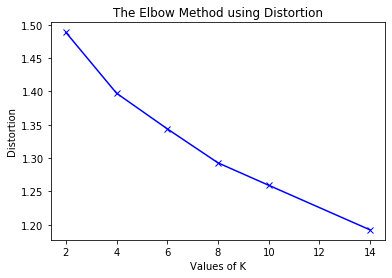

In [9]:
#Finding the best number of clusters based on minimum value of distortion and inertia.
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


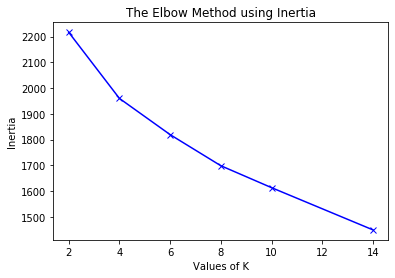

In [10]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


In [11]:
kmeans = KMeans(n_clusters=14, random_state=0).fit(a)

In [12]:
#Dictionary containing clusters and corresponding data points.
d={i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

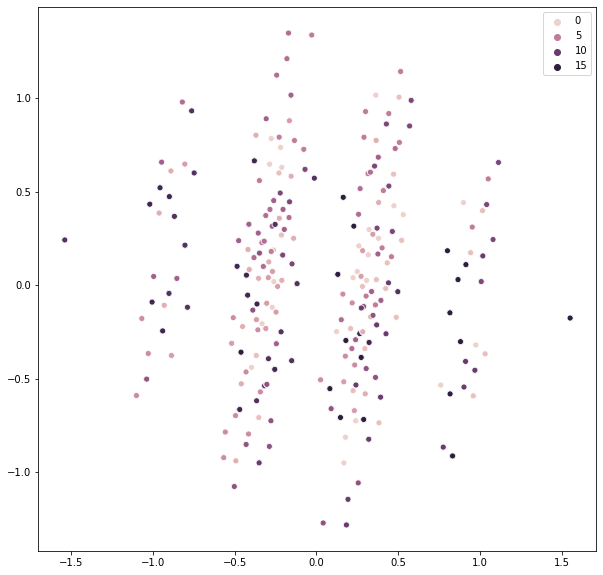

In [13]:
from sklearn.decomposition import PCA
import seaborn as sns
pca=PCA().fit(a)
pca2d=pca.transform(a)
plt.figure(figsize=(10,10))
labels=kmeans.labels_
sns.scatterplot(pca2d[:,0],pca2d[:,1],hue=labels)
plt.show()

In [19]:
import pickle
dbfile=open('model','ab')
pickle.dump(kmeans,dbfile)
dbfile.close()

In [20]:
dbfile=open('clusters','ab')
pickle.dump(d,dbfile)
dbfile.close()

In [21]:
f=np.array(f)

In [22]:
dbfile=open('users','ab')
pickle.dump(f,dbfile)
dbfile.close()